In [2]:
import numpy as np #Importing necessary datafiles
import pandas as pd
import math
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_excel(r'C:\Users\madhu\Desktop\MP1 SI\SI DATA.xlsx')

In [4]:
df = pd.DataFrame(data)

1a) Indexed by trading days, please arrange the data as a text file (or excel
file) that is easy to be used for programming.

In [5]:
df.head()

,Trading Days,GOLD,USD Index,W T I Crude Oil Prices
0,2020-01-01,NaN,96.39,NaN
1,2020-01-02,1520.55,96.85,61.18
2,2020-01-03,1547.40,96.84,63.05
3,2020-01-06,1576.85,96.67,63.27
4,2020-01-07,1566.50,97.00,62.70


In [5]:
df.index = pd.to_datetime(df['Trading Days'])#making date as index for the dataframe

In [6]:
df = df.drop(['Trading Days'],axis = 1)
df.head()

,GOLD,USD Index,W T I Crude Oil Prices
Trading Days,,,
2020-01-01,NaN,96.39,NaN
2020-01-02,1520.55,96.85,61.18
2020-01-03,1547.40,96.84,63.05
2020-01-06,1576.85,96.67,63.27
2020-01-07,1566.50,97.00,62.70


In [7]:
df.count()



GOLD                      253
USD Index                 262
W T I Crude Oil Prices    252
dtype: int64

In [8]:
df = df.dropna()
df.count()

GOLD                      247
USD Index                 247
W T I Crude Oil Prices    247
dtype: int64

In [9]:
df.corr()
#hetamap 

,GOLD,USD Index,W T I Crude Oil Prices
GOLD,1.000000,-0.790965,0.007230
USD Index,-0.790965,1.000000,-0.412865
W T I Crude Oil Prices,0.007230,-0.412865,1.000000


1b) If the Gold price on August 11 is erased due to hard disk error, can you
recover the gold price on August 11 by the regression of Gold price?

In [10]:
X = df[['W T I Crude Oil Prices']]
Y = df['GOLD']
model = LinearRegression()
model.fit(X,Y)
print('intercept:',model.intercept_)
print('coefficient:',model.coef_)

intercept: 1769.0294773430246
coefficient: [0.10025028]


In [11]:
result = df.loc[['2020-08-11'],['W T I Crude Oil Prices']] 
result
# [0]['A']

,W T I Crude Oil Prices
Trading Days,
2020-08-11,41.61


In [12]:
b1 = result.iloc[0]['W T I Crude Oil Prices']
print(b1)
predict_oil = model.predict([[b1]])#41.61 is WTI crude oil on 11 th August 
print("Gold Price on 11th August based on WTI Crudel oil price on the same day is: USD",predict_oil)

41.61
Gold Price on 11th August based on WTI Crudel oil price on the same day is: USD [1773.20089145]


In [13]:
X = df[['USD Index']]
Y = df['GOLD']
model = LinearRegression()
model.fit(X,Y)
print('intercept:',model.intercept_)
print('Coefficient:',model.coef_)


intercept: 5170.390155653377
Coefficient: [-35.46645852]


In [14]:
result = df.loc[['2020-08-11'],['USD Index']] 
result

,USD Index
Trading Days,
2020-08-11,93.63


In [15]:
b2 = result.iloc[0]['USD Index']
print(b2)
predict_usd = model.predict([[b2]])#93.63 is USD index on on 11 th August 
print("Gold Price on 11th August based on USD Index is: USD",predict_usd)

93.63
Gold Price on 11th August based on USD Index is: USD [1849.6656446]


1c) If the Gold price on August 11 is erased due to hard disk error, can you
recover the gold price on August 11 by multiple regression of US Dollar
Index and West Texas Oil price?

In [16]:
x = df[['W T I Crude Oil Prices','USD Index']]
y = df['GOLD']
mmodel = LinearRegression()
mmodel.fit(x,y)
print('intercept:',mmodel.intercept_)
print('Coeffcient:',mmodel.coef_)

intercept: 6065.08574844133
Coeffcient: [ -5.33755146 -42.59288186]


In [17]:
result = df.loc[['2020-08-11'],['USD Index','W T I Crude Oil Prices']]
result

,USD Index,W T I Crude Oil Prices
Trading Days,,
2020-08-11,93.63,41.61


In [18]:
a1 = result.iloc[0]['USD Index']
a2 = result.iloc[0]['W T I Crude Oil Prices']

In [19]:
predict_m = mmodel.predict([[a1,a2]])
print('Gold Price on 11 th August based on WTI Crudel oil price and USD Index is USD',predict_m)

Gold Price on 11 th August based on WTI Crudel oil price and USD Index is USD [3793.04099078]


Can you use the regression model to predict the Gold price on the first
trading day in 2021, without checking the data? That is, repeat (a) and (b)
but knowing all 2020 data to predict the first trading day in 2021.

In [20]:
USDIndex_median = df['USD Index'].median()
predict = model.predict([[USDIndex_median]])

In [23]:
predict

array([1750.35956075])

In [72]:
print('Gold Price on the 1 st January, 2021 based on previous year USD index is USD',predict)#

Gold Price on the 1 st January, 2021 based on previous year USD index is USD [1750.35956075]


In [73]:
WTI_Crude_Oil_Prices_median = df['W T I Crude Oil Prices'].median()
predict = 0
predict = model.predict([[WTI_Crude_Oil_Prices_median]])

In [74]:
print('Gold Price on the 1 st January 2021,based on previous year Crude Oil Prices 2021 is USD',predict)

Gold Price on the 1 st January 2021,based on previous year Crude Oil Prices 2021 is USD [3728.67861689]


In [75]:
mm_predict = mmodel.predict([[WTI_Crude_Oil_Prices_median, USDIndex_median]])
print('Gold Price on the 1 st January 2021 based on previous year USD index and Crude Oil Prices 2021 is USD',mm_predict)

Gold Price on the 1 st January 2021 based on previous year USD index and Crude Oil Prices 2021 is USD [1740.88268382]


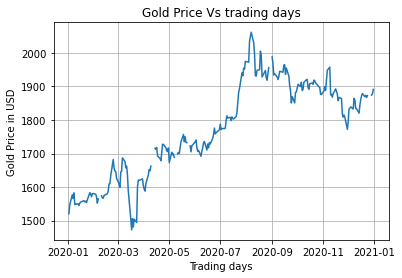

In [11]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = df['Trading Days']
ypoints = df['GOLD']

plt.title("Gold Price Vs trading days")
plt.xlabel("Trading days")
plt.ylabel("Gold Price in USD")
plt.plot(xpoints, ypoints)
plt.grid()
plt.show()